In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
dataset =pd.read_csv("mtcars.csv")

In [197]:
dataset.shape

(32, 11)

In [198]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


In [203]:
dataset.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [204]:
dataset.isnull().sum()


mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [148]:
dataset.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [151]:
X = dataset.drop(["mpg","cyl","vs","am","gear","carb"],axis=1)

In [154]:
y = dataset["mpg"]

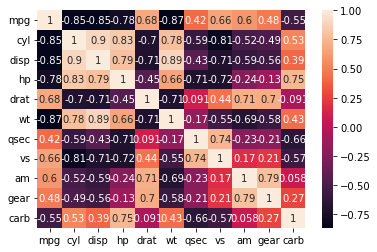

In [158]:
sns.heatmap(dataset.corr(),annot=True)
plt.show()

<AxesSubplot:ylabel='Density'>

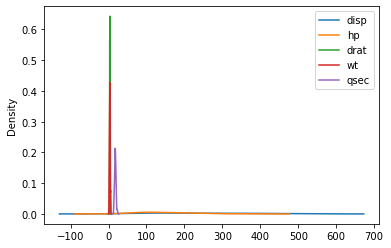

In [160]:
X.plot.kde()

In [161]:
from sklearn.model_selection import train_test_split

In [192]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [193]:
X_test

,disp,hp,drat,wt,qsec
11,275.8,180,3.07,4.070,17.40
22,304.0,150,3.15,3.435,17.30
10,167.6,123,3.92,3.440,18.90
2,108.0,93,3.85,2.320,18.61
16,440.0,230,3.23,5.345,17.42
14,472.0,205,2.93,5.250,17.98
28,351.0,264,4.22,3.170,14.50


In [164]:
from sklearn.preprocessing import scale

In [165]:
X_train = scale(X_train)

In [168]:
X_test = scale(X_test)

In [170]:
X_train_df = pd.DataFrame(X_train)

<AxesSubplot:ylabel='Density'>

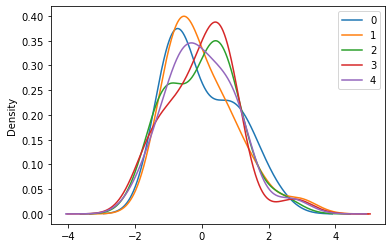

In [171]:
X_train_df.plot.kde()

In [172]:
from sklearn.linear_model import LinearRegression

In [175]:
lr = LinearRegression()

In [176]:
lr.fit(X_train,y_train)

LinearRegression()

In [177]:
y_pred = lr.predict(X_test)

In [180]:
df = pd.DataFrame({"Actual":y_test, "Predict" : y_pred})

In [188]:
df

,Actual,Predict
11,16.4,18.793636
22,15.2,23.029721
10,17.8,25.012059
2,22.8,29.903962
16,14.7,14.079122
14,10.4,15.418862
28,15.8,22.106638


In [185]:
print("Accurancy :",lr.score(X_train,y_train)*100)

Accurancy : 88.2863614911906


In [186]:
from sklearn.metrics import r2_score,mean_squared_error

In [187]:
mean_squared_error(y_test,y_pred)

33.5517493204191

In [195]:
r2_score(y_test,y_pred)

-1.8229604668782162